# Tutorial 2 - Normalising abundances
Download notebook: [ccsne_tutorial2.ipynb](https://github.com/mattias-ek/SIMPLE/blob/master/notebooks/ccsne_tutorial2.ipynb)
Like in the previous tutorial we start by importing the simple package and changing the logging level to provide more detailed output.

There are two types of normalisation available within simple; *standard normalisation* and *internal normalisation*. These are the normalisations most commonly used for stardust and meteorite data respectively.  

We begin by loading the model collection that we created in [Tutorial 1]().

In [1]:
import simple
simple.set_logging_level('INFO')

models = simple.load_collection('data/CCSNe_FeNi.hdf5')

SIMPLE.models - INFO - Loading existing file: data/CCSNe_FeNi.hdf5
SIMPLE.models - INFO - Loading file: data/CCSNe_FeNi.hdf5
SIMPLE.models - INFO - Loading ref: W17 (IsoRef)
SIMPLE.models - INFO - Loading ref: iniab2.0E-02GN93 (IsoRef)
SIMPLE.models - INFO - Loading ref: iniab2.0E-02GN93_Lo03 (IsoRef)
SIMPLE.models - INFO - Loading ref: iniab1.3E-02Lo03_Lo03_merged (IsoRef)
SIMPLE.models - INFO - Loading ref: rau_solar_ref (IsoRef)
SIMPLE.models - INFO - Loading ref: iniab1.3E-02As09_As09_merged (IsoRef)
SIMPLE.models - INFO - Loading model: Ri18_m15 (CCSNe)
SIMPLE.models - INFO - Loading model: Ri18_m20 (CCSNe)
SIMPLE.models - INFO - Loading model: Ri18_m25 (CCSNe)
SIMPLE.models - INFO - Loading model: Pi16_m15 (CCSNe)
SIMPLE.models - INFO - Loading model: Pi16_m20 (CCSNe)
SIMPLE.models - INFO - Loading model: Pi16_m25 (CCSNe)
SIMPLE.models - INFO - Loading model: La22_m15 (CCSNe)
SIMPLE.models - INFO - Loading model: La22_m20 (CCSNe)
SIMPLE.models - INFO - Loading model: La22_m25 (CC

## Normalisation Standard
The *standard* for nucleosynthetic models should ideally be the starting composition of the model which is typically the solar composition scaled to achieve the desired metallicity. If a different standard is used it is possible to generate erroneous artifacts, see discussion in [Lugaro et al. 2023](https://doi.org/10.1140/epja/s10050-023-00968-y). To avoid this issue, each SIMPLE *model* contains a reference to the correct *standard* which is automatically used during the normalisation procedures.

## Standard Normalisation
This is the normalisation commonly used for stardust data. It is simply the ratio of the *sample* over that of a *standard* minus 1. 

$$
R^{\mathrm{SMP}}_{ij} = {\left(\frac{r^{\mathrm{SMP}}_{ij}}{R^{\mathrm{STD}}_{ij}}\right)} - 1
$$

All that is needed to perform this normalisation is the denominator isotope *j*. By default, all isotopes of the denominator element, ``Ni*`` in the example below, will normalised. The normalisation should be done using molar abundances. Therefore, if the abundances are in mass fractions they will be automatically converted to molar abundances, as can be seen in the output below.

The documentation for this function can be found [here](https://mattias-ek.github.io/SIMPLE/api/norm/#simple.norm.standard_normalisation).

In [2]:
models.standard_normalisation('Ni-61*')

SIMPLE.models - INFO - Ri18_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.models - INFO - iniab2.0E-02GN93.data: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.norm - INFO - Ri18_m15.abundance-ratnorm: Normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to Ni-61*.
SIMPLE.models - INFO - Ri18_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.models - INFO - iniab2.0E-02GN93.data: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.norm - INFO - Ri18_m20.abundance-ratnorm: Normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to Ni-61*.
SIMPLE.models - INFO - Ri18_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.models - INFO - iniab2.0E-02GN93.data: Converting array from ``mass`` to ``mole`` unit

The result of the *standard normalisation* is by default stored in a new model attribute called *stdnorm*. This attribute is a dictionary that contains the normalised values, *Ri*, plus some additional items seen below. The *Ri* attribute contains a key array that maps the numerator isotope (*i*) to the normalised value. The denominator isotope (*j*) is always inferred and should therefore not be included when accessing the normalised data.

In [3]:
models[0].stdnorm.keys()

dict_keys(['Ri_values', 'Ri_keys', 'Ri', 'dilution_factor', 'ij_keys', 'Ri_keylabels', 'Ri_keylabels_latex'])

To plot the results of the *standard normalisation* we can use the *stdnorm* shortcut on the different plot functions. As mentioned above only the numerator isotope (*i*) should be specified as the denominator (*j*) is always implicitly inferred. The denominator isotope is always included in the key label however, so that it is clear what is being plotted. 

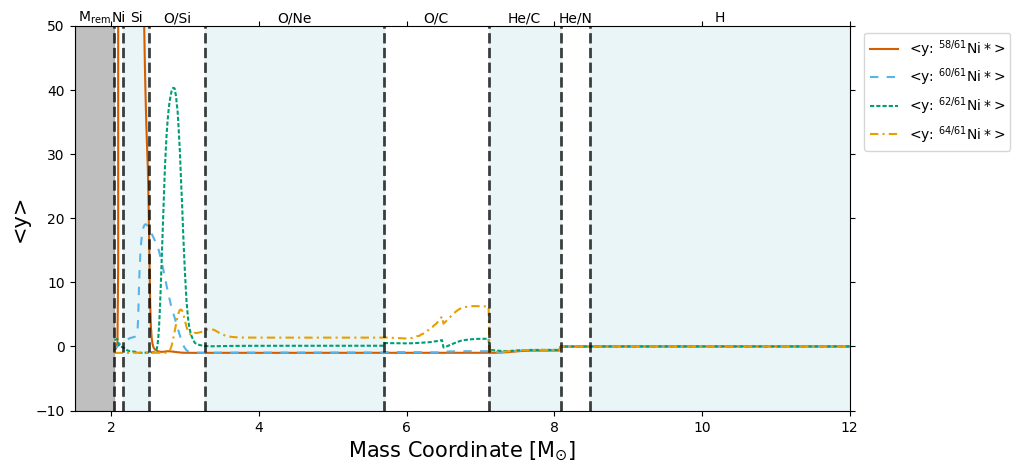

In [4]:
simple.plot_ccsne.stdnorm(models, 'Ni-58*, Ni-60*, Ni-62*, Ni-64*', 
                            where='.mass==25 & .dataset == Ra02',
                            ax_xlim=(1.5, 12), ax_ylim=(-10, 50));

Plotting the slope of two normalised values is as simple as specifying the two isotopes as a ratio

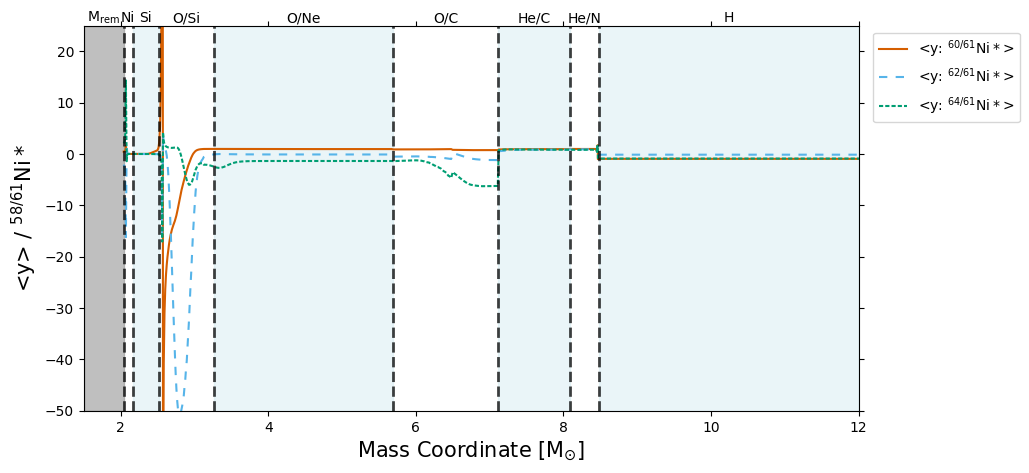

In [5]:
simple.plot_ccsne.stdnorm(models, 'Ni-60*/Ni-58*, Ni-62*/Ni-58*, Ni-64*/Ni-58*', 
                          where='.mass==25 & .dataset == Ra02',
                          ax_xlim=(1.5, 12), ax_ylim=(-50, 25));

## Internal Normalisation
Internal normalisation is commonly used to correct for mass-dependent fractionation that may occur naturally or be introduced during isotopic measurement of natural samples. It used an additional normalising step compared to the *standard normalisation* where the ratio *kj* of the *sample* is fixed to the value of the *standard*. Because the compositional variation in meteorite samples are typically very small they are usually given in epsilon notation which is simply the result of the normalisation multiplied by 10^4. 

$$
\epsilon R^{\mathrm{SMP}}_{ij} = {\left[{\left(\frac{r^{\mathrm{SMP}}_{ij}}{R^{\mathrm{STD}}_{ij}}\right)}
{\left(\frac{r^{\mathrm{SMP}}_{kj}}{R^{\mathrm{STD}}_{kj}}\right)}^{-Q_i} - 1
\right]} \times 10^4
$$

This *internal* normalisation can significantly alter the results and therefore internally normalised data *cannot* be directly compared to dust/meteorite data or nucleosynthetic models that have been normalised using the *standard normalisation* method, see discussion in [Lugaro et al. (2003)](https://doi.org/10.1140/epja/s10050-023-00968-y).

One thing to be careful of it that the internal normalisation procedure is exponential in nature and therefore mixing lines will not be linear. There are two approaches to internally normalising nucleosynthetic models so that they can be compared to meteorite data implemented in SIMPLE; *largest offset* and *linear*. See [Lugaro et al. (2003)](https://doi.org/10.1140/epja/s10050-023-00968-y) for a discussion of these method. Here we will only describe the *largest offset* method which is the default method used for the *internal normisation method*, however, the linear method is also avaliable. It works by creating a diluted sample where the largest offset is the same order of magnitude as meteorite data, by default ``1`` ε-unit.

$$
C_{SMP} = C_{\mathrm{STD}} +  \left(\frac{C_{ABU}}{\mathrm{df}}\right)
$$

Here the abundance refers to the nucleosynthetic yields and *df* stands for dilution factor.

All that is needed to perform this normalisation is the *kj* ratio. Again by default all available isotopes of the denominator isotope *j* will be included in the normalised array. The *largest offset* method calculates the isotopic variation at the dilution factor where the largest offset amongst the isotopes is ±1. This is ideal for comparison with bulk rock meteorite data. The function also implements a minimum dilution factor, by default ``0.1``, that sets all values that would require a dilution factor smaller than this to ``np.nan``, to avoid artifacts due to rounding errors.

The documentation for this function can be found [here](https://mattias-ek.github.io/SIMPLE/api/norm/#simple.norm.internal_normalisation).

In [6]:
models.internal_normalisation('Ni-58*/Ni-61*')

SIMPLE.models - INFO - Ri18_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.models - INFO - iniab2.0E-02GN93.data: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.norm - INFO - Ri18_m15.abundance-intnorm: Internally normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to Ni-58*/Ni-61*.
SIMPLE.norm - INFO - Ri18_m15.abundance-intnorm-largest_offset: Internally normalising 2158 rows using the largest offset method.
SIMPLE.norm - WARNING - Ri18_m15.abundance-intnorm-largest_offset: 695 rows out of 2158 have largest offsets smaller than 1 ε-units at the minimum dilution factor of 0.1. These rows are set to nan.
SIMPLE.models - INFO - Ri18_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.models - INFO - iniab2.0E-02GN93.data: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
S

The result of the *internal normalisation* is by default stored in a new model attribute called *intnorm*. This attribute is a dictionary that contains the normalised values, *eRi*, plus some additional items seen below. The *eRi* attribute contains a key array that maps the numerator isotope (*i*) to the normalised value. The denominator isotope (*j*) is always inferred and should therefore not be included when accessing the normalised data.

In [7]:
models[0].intnorm.keys()

dict_keys(['eRi_values', 'dilution_factor', 'largest_offset', 'min_dilution_factor', 'method', 'eRi', 'eRi_keys', 'ij_keys', 'kj_keys', 'eRi_keylabels', 'eRi_keylabels_latex'])

The plotting function have a shortcut called *intnorm* for plotting internally normalised data. In the example below we can see that there is no data for the H envelope. This is because these data points did not exceed the minimum dilution factor. In the plot we can see that the largest offset at any coordinate is always ``±1``. The key label will include a reference to the last digits of the mass numbers for the internal normalisation ratio *kj*, in this case (81) for ``Ni-58*/Ni-61*``.

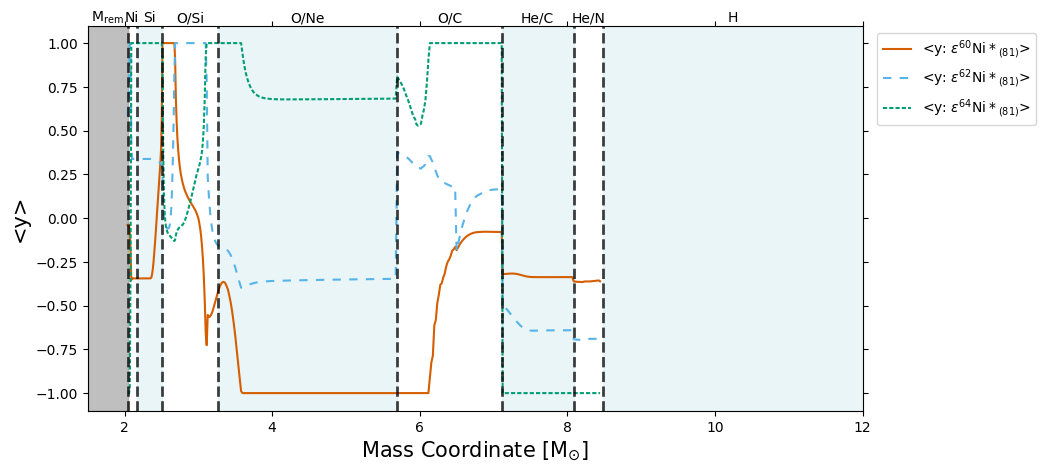

In [8]:
simple.plot_ccsne.intnorm(models, 'Ni-60*, Ni-62*, Ni-64*', 
                            where='.mass==25 & .dataset == Ra02',
                            ax_xlim=(1.5, 12));

To plot the dilution factor we just have to specify the path to this attribute

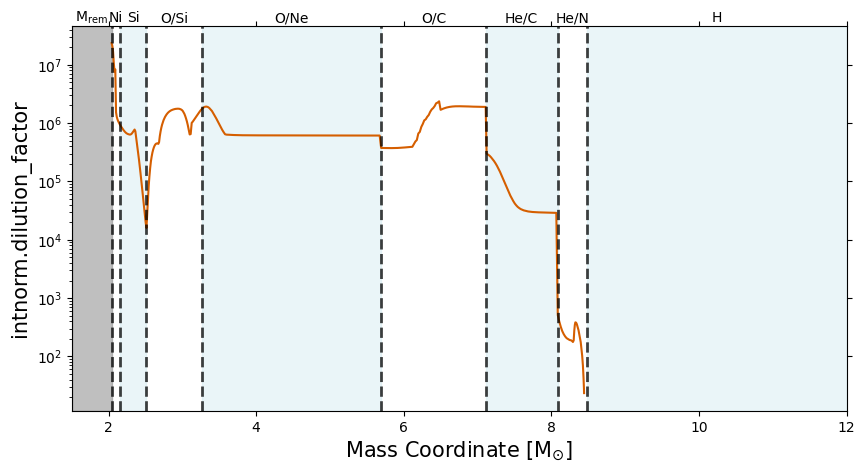

In [9]:
simple.plot_ccsne(models, '.intnorm.dilution_factor',
                            where='.mass==25 & .dataset == Ra02',
                            ax_xlim=(1.5, 12), semilog=True);

Again the slope can be plotted by giving the ratio of the different numerator isotopes *i*.

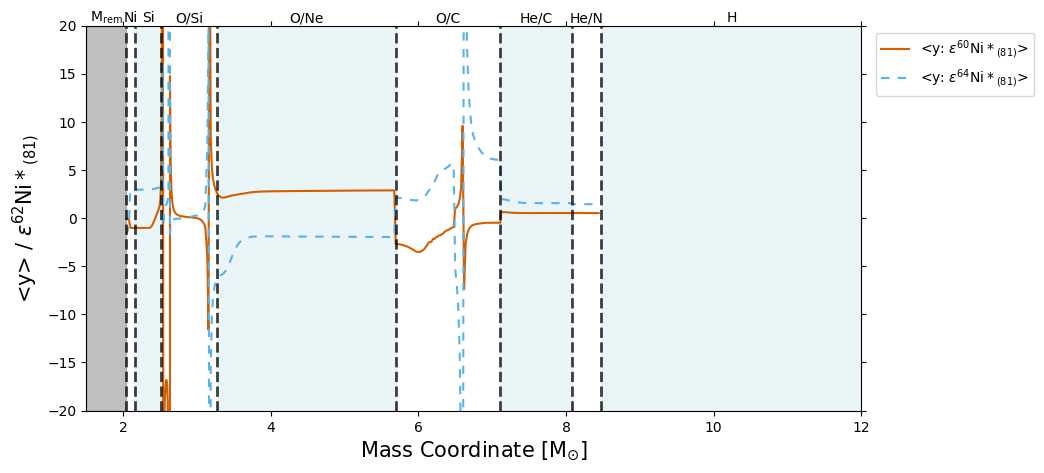

In [10]:
simple.plot_ccsne.intnorm(models, 'Ni-60*/Ni-62*, Ni-64*/Ni-62*', 
                          where='.mass==25  & .dataset == Ra02',
                          ax_xlim=(1.5, 12), ax_ylim=(-20, 20));

## Multiple Elements
It is possible to normalise multiple elements at once for both the *standard normalisation* and *internal normalisation* procedures. All you need to do is supply a list of the normalising values. The normalisation procedure is performed accross all isotopes for the different normalisations at the same time allowing you to directly compare the result from the different normalisations.

To mimic the effects of chemical fractionation it is possible to set different enrichment factors for isotopes of the different normalisations. In the example below we have doubled the amount of Fe to mimic a process that enriched Fe, or depleted Ni. This enrichment is relative to the orignal model abundances. It is also possible to set the exact abundance of each set of isotopes using the ``relative_enrichment=False`` argument. In this scenario the sum off all isotopes for each normalisation will be set to the specified *enrichment factor*. 

You can change the standard abundances the same way using the ``std_enrichment_factor`` and ``std_relative_enrichment`` arguments.

In [11]:
models.internal_normalisation(['Ni-58*/Ni-61*', 'Fe-57*/Fe-56*'], enrichment_factor=[1,2])

SIMPLE.models - INFO - Ri18_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.models - INFO - iniab2.0E-02GN93.data: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
SIMPLE.norm - INFO - Ri18_m15.abundance-intnorm: Internally normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to Ni-58*/Ni-61*.
SIMPLE.norm - INFO - Ri18_m15.abundance-intnorm: Internally normalising ('Fe-54*', 'Fe-56*', 'Fe-57*', 'Fe-58*') to Fe-57*/Fe-56*.
SIMPLE.norm - INFO - Ri18_m15.abundance-intnorm: Applying relative enrichment factor to model abundances. Multiplying all isotopes by 2.
SIMPLE.norm - INFO - Ri18_m15.abundance-intnorm-largest_offset: Internally normalising 2158 rows using the largest offset method.
SIMPLE.norm - WARNING - Ri18_m15.abundance-intnorm-largest_offset: 695 rows out of 2158 have largest offsets smaller than 1 ε-units at the minimum dilution factor of 0.1. These rows are set to nan

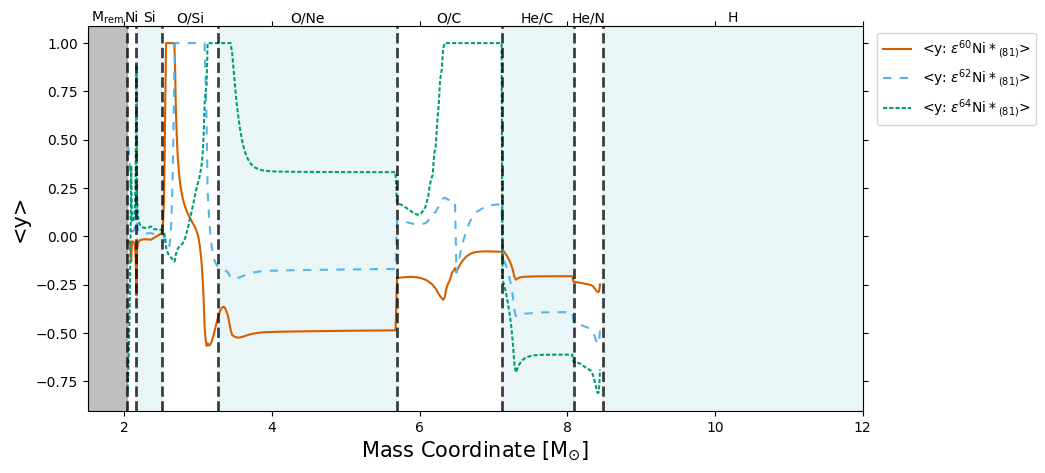

In [12]:
simple.plot_ccsne.intnorm(models, 'Ni-60*, Ni-62*, Ni-64*', 
                            where='.mass==25 & .dataset == Ra02',
                            ax_xlim=(1.5, 12));

The figure above looks different from the one produced when we only normalised Ni. This is because at some coordinates the largest offset is defined by an Fe isotope which therefore changes the magnitude of the Ni variations. The relative Ni variations though remain the same which can be seen if we plot the slopes


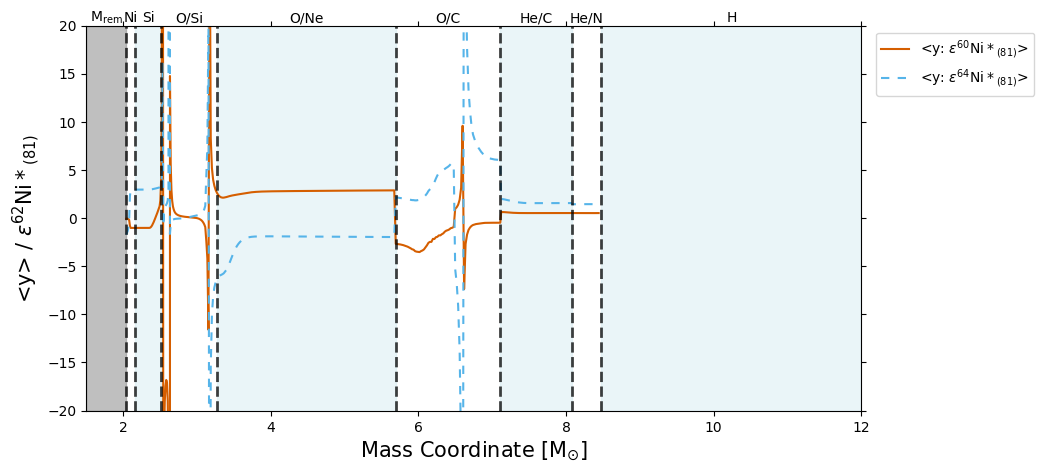

In [13]:
simple.plot_ccsne.intnorm(models, 'Ni-60*/Ni-62*, Ni-64*/Ni-62*', 
                          where='.mass==25 & .dataset == Ra02',
                          ax_xlim=(1.5, 12), ax_ylim=(-20, 20));

We can plot any isotopes from any normalisation we can plot the slopes of Ni vs Fe isotopes.

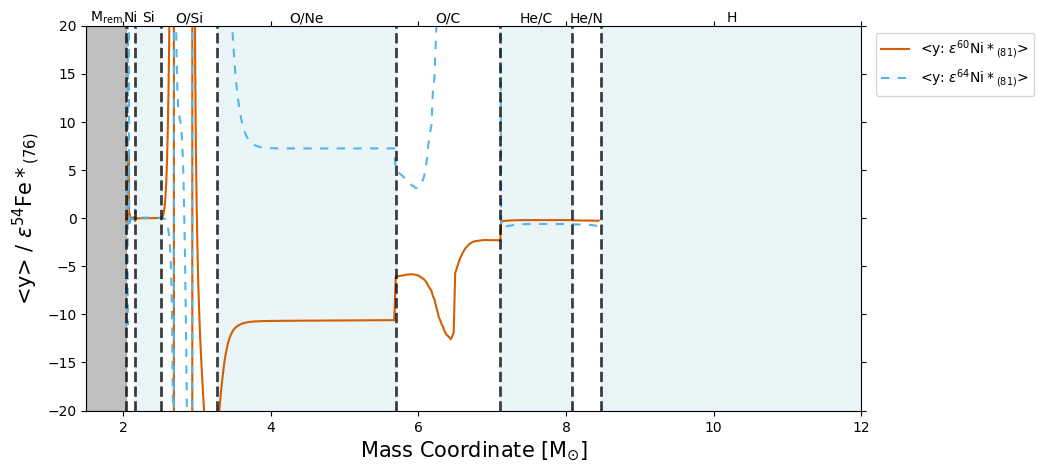

In [14]:
simple.plot_ccsne.intnorm(models, 'Ni-60*/Fe-54*, Ni-64*/Fe-54*', 
                          where='.mass==25 & .dataset == Ra02',
                          ax_xlim=(1.5, 12), ax_ylim=(-20, 20));

## Slope Histograms
Another way to compare slopes from multiple models at once is to plot a 2d histogram. This can make it easier see which slopes are the most dominant for the different models. In the examples below we plot the slope of ``Ni-62*/Ni-60*`` for the different models from the ``Ra02`` data set.

In this example the weight of each bin is equal to the number of mass coordinates in that bin.

SIMPLE.plot - INFO - Normalising weights so that the sum of all weights is equal to 1.
SIMPLE.plot - WARNING - Wrong Axes projection for rose plot. Deleting axes and creating a new one.


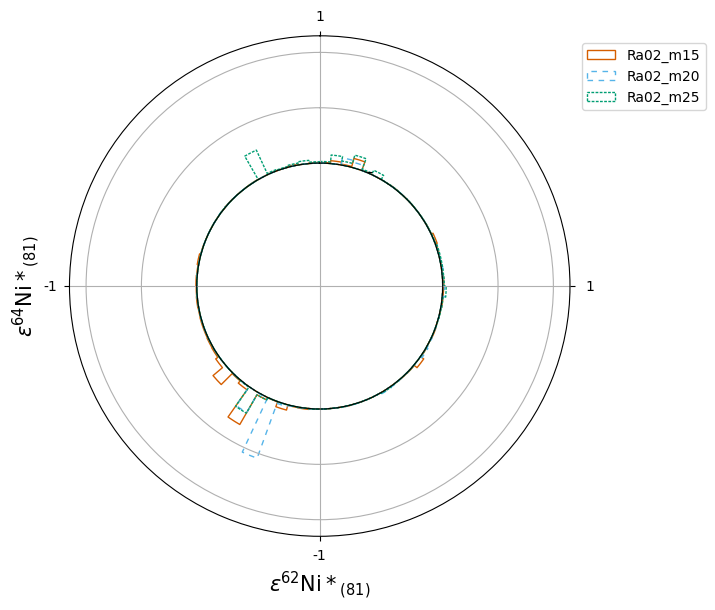

In [15]:
simple.hist.intnorm(models, 'Ni-62*', 'Ni-64*', where='.dataset == Ra02');

In the previous example each coordinate carries the same weight irrespective of the mass of Ni and the overall mass for each coordinate. 

We can change the weight of each coordinate to be equal to the sum of all Ni isotopes in that coordinate using the ``weights`` argument. We can either pass a list of all the isotopes we wish to add together or we can pass the element symbol from which all isotopes will be automatically summed up. Additionally, the ``hist_ccsne`` function will automatically multiply all weights by the mass of each mass coordinate.

We can see some differences between the plots. There are some slopes that are present in many coordinates but have low Ni abundance or a low coordinate mass and therefore are much less prominent in the new plot.

SIMPLE.plot - INFO - Ra02_m15: Calculating weights by adding together: abundance | <w> [mass] <w: Ni-58*, Ni-60*, Ni-61*, Ni-62*, Ni-64*>
SIMPLE.plot - INFO - Ra02_m20: Calculating weights by adding together: abundance | <w> [mass] <w: Ni-58*, Ni-60*, Ni-61*, Ni-62*, Ni-64*>
SIMPLE.plot - INFO - Ra02_m25: Calculating weights by adding together: abundance | <w> [mass] <w: Ni-58*, Ni-60*, Ni-61*, Ni-62*, Ni-64*>
SIMPLE.ccsne - INFO - Multiplying all weights by the mass coordinate mass
SIMPLE.plot - INFO - Normalising weights so that the sum of all weights is equal to 1.
SIMPLE.plot - WARNING - Wrong Axes projection for rose plot. Deleting axes and creating a new one.


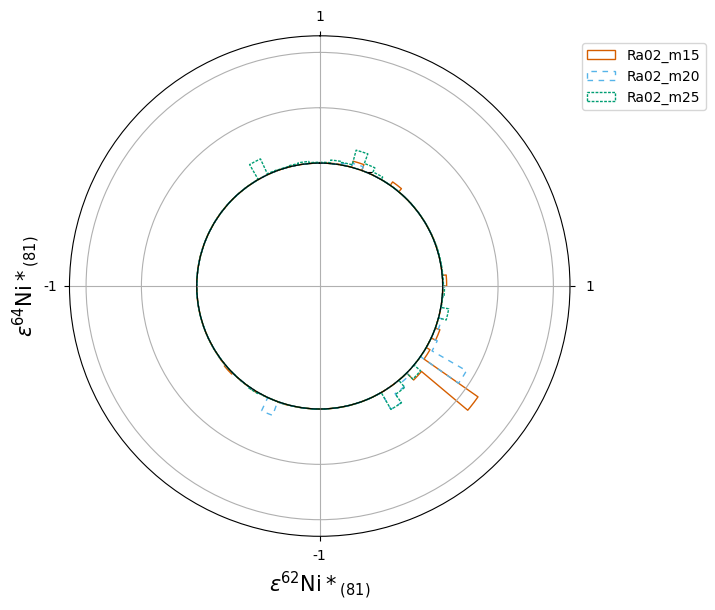

In [16]:
simple.hist_ccsne.intnorm(models, 'Ni-62*', 'Ni-64*', weights='Ni*',
                            where='.dataset == Ra02', legend=True);